In [8]:
import braintools
import brainunit as u
import matplotlib.pyplot as plt
import braincell

## Code Explanation

### Creating Calcium Channel Models

`braincell` provides various ion channel models based on classical literature, named in the format `ChannelType_LiteratureID`, for example, `ICaT_HP1992` represents a T-type calcium channel based on Huguenard & Prince 1992.
If you want to learn more about ion channel models, you can refer to our [Ion Channel Model Library](https://braincell.readthedocs.io/latest/apis/braincell.channel.html).


In [9]:
# Create Low-Threshold T-Type Calcium Channel (ICaT)
cat = braincell.channel.ICaT_HP1992(1)

# Create High-Threshold Calcium Channel (ICaHT)
caht = braincell.channel.ICaHT_HM1992(1)


### Generate Voltage Sequence

To analyze how channel gating properties change with membrane potential, we generate a continuous voltage sequence from -100 mV to 0 mV:


In [10]:
# Generate Voltage Sequence
vs = u.math.arange(-100 * u.mV, 0 * u.mV, 0.1 * u.mV)

### Calculate Steady-State Gating Variables and Plot

The steady-state values of ion channel gating variables describe the probability that the channel gates are open at a given membrane potential. We calculate these values using the channel's `f_q_inf` and `f_p_inf` methods and visualize the comparison:


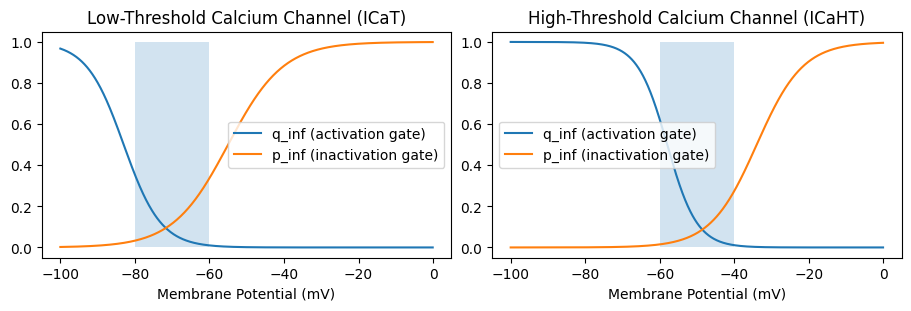

In [11]:
# Create Figure and Subplot Layout
fig, gs = braintools.visualize.get_figure(1, 2, 3., 4.5)

# Compute steady-state values of activation and inactivation gates for low-threshold channel
q_inf = cat.f_q_inf(vs)
p_inf = cat.f_p_inf(vs)

# Add subplot 1
fig.add_subplot(gs[0, 0])
plt.plot(vs / u.mV, q_inf, label='q_inf (activation gate)')  # Convert x-axis to mV for readability
plt.plot(vs / u.mV, p_inf, label='p_inf (inactivation gate)')
plt.legend()  # Show legend
plt.fill_between([-80, -60], 1., alpha=0.2)  # Highlight typical activation range for low-threshold channel
plt.title('Low-Threshold Calcium Channel (ICaT)')
plt.xlabel('Membrane Potential (mV)')

# Compute q_inf and p_inf for high-threshold channel
q_inf = caht.f_q_inf(vs)
p_inf = caht.f_p_inf(vs)

# Add subplot 2
fig.add_subplot(gs[0, 1])
plt.plot(vs / u.mV, q_inf, label='q_inf (activation gate)')
plt.plot(vs / u.mV, p_inf, label='p_inf (inactivation gate)')
plt.fill_between([-60, -40], 1., alpha=0.2)  # Highlight typical activation range for high-threshold channel
plt.legend()
plt.xlabel('Membrane Potential (mV)')
plt.title('High-Threshold Calcium Channel (ICaHT)')

# Display figure
plt.show()


## Result Interpretation

After running the code, you will see two plots of the gating characteristics.

Analyzing the two gating characteristic plots, the key conclusions are as follows:

Low-threshold calcium channel (ICaT):
   - `q_inf` rises significantly at membrane potentials around -80 ~ -60 mV, indicating that the channel is easily activated within this range.
   - This matches the shaded region, showing that the channel can be activated near the neuron's resting potential.

High-threshold calcium channel (ICaHT):
   - `q_inf` only rises significantly at membrane potentials around -60 ~ -40 mV, indicating a higher activation threshold.
   - The shaded area corresponds to its typical activation range, requiring stronger depolarization to activate.

## Extended Exercises

- Try modifying the channel's conductance density parameter and observe whether the gating curves change.
- Compare the gating characteristics of other ion channels to understand how different channels cooperate during action potentials.

With these tools, you can quickly build channel models that align with electrophysiological properties, laying the foundation for complex neural dynamics simulations.
